#  ML-2. Предобработка данных 

## О чём этот модуль

**Предобработка данных** — это действия с данными перед передачей их модели, могут включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку. Часто требуется при необходимости очистить данные от ненужного или дополнить какой-то информацией.

**План модуля:**

- Типы данных и их проблемы.
- Работа с пропусками и начальная обработка.
- Визуализация для предобработки.
- Feature engineering (создание своих признаков).
- Как искать и избавляться от выбросов.

## Типы данных

1. **Признаки**. Объект со свойствами, например, пол, возраст, воинское звание, средний чек в супермаркете за последний месяц, дескрипторы лица. 
    - **категориальными** (мужской и женский пол)
    - **числовыми** (возраст, сумма в чеке) 
    - **ординальными/смешанными** (воинское звание - признаки и числа (ранг) и категории)

2. **Временные ряды**. Значения меняются во времени, например, рост курса рубля к доллару, голос человека на записи, ЭКГ.
3. **Изображения**. Примеры: видеонаблюдение, компьютерная томография, снимок рентген, спутниковые снимки.
4. **Тексты**. Слова и фразы, к которым можно применять разные задачи: оценивать тональность, искать факты, делать машинный перевод, производить суммаризацию статей (краткое изложение текста с помощью МО).
5. **Другие типы** Граф подписок в Instagram, лог работы сервера, показатель растительности поля (NDVI), истории болезни, названия товаров в чеке

**Избегайте ловушек при определении типа признака**

Важно отметить, что несмотря на то, что в **качественных (ординальных или категориальных) признаках не фигурируют числа**, они все же **могут быть закодированы числами**. Например, иногда в опросниках мужской пол обозначают как 1, а женский как 0. Однако здесь эти числа не имеют математического значения, поэтому данные не являются количественными (числовыми). То есть, 1 и 0 здесь просто являются символами для обозначения мужчин и женщин. И ни в коем случае нельзя воспринимать их как числа и говорить, что мужчина на 1 больше, чем женщина.
    
Или в социологических опросах часто кодируют шкалы числами. Например, 1- «согласен», 2 – «почти согласен», 3 – «затрудняюсь ответить», 4 – «скорее не согласен», 5 – «не согласен». Нельзя сказать, что человек, ответивший «скорее не согласен» на некую условную единицу более согласен, чем тот, который ответил «не согласен». Такой признак абсолютно точно будет ординальным.

<br><br>
И заметьте, что часто **ординальные признаки** называют **порядковыми**, **категориальные - номинальными**, а **числовые - количественными**. Это происходит по той причине, что анализ данных и статистика пронизывают практически все научные области, но исторически в разных науках сформировалась разная терминология.

## Практика

In [1]:
import pandas as pd 
import numpy as np


data = pd.read_csv('datasets/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

## Проблемы данных

1. **Неполные данные**: заказчик выслал не все данные, в них есть пропуски, нет данных за определённый период, есть данные только для части задач. Например, есть рейсы только одной авиакомпании, есть суммы покупок с января по март и с июня по декабрь.
2. **Грязные данные**:
    — данные в плохом или разном формате;
    — в данных есть мусор, например, смешиваются русские и английские буквы, данные в виде шифра,
    — разные меры данных, например, часть в метрах, часть в футах; 
    — данные старые, значения признака перемешиваются.

3. **Плохая разметка**: в данных есть ошибки, разная оценка данных из-за человеческого фактора, разметка не соответствует реальности, размеченных данных очень много — должна быть «золотая середина». Чем лучше хотите получить разметку, тем больше времени придётся потратить.
4. **Данные с утечкой**: в данных нужно избегать признаков, от которых явно зависит целевая переменная. Такая ситуация приводит к тому, что во время обучения модель всё предсказывает, но в боевых условиях бесполезна.

## Пропуски в данных

**Пропуски** — отсутствие значений в данных. Обычно это случается из-за ошибок человека: забыли, какие данные не внесли, не всё перенесли из другого документа, неверно заполнили документ, случайно удалили часть данных. Например, при опросе респонденты отвечали только на часть вопросов, не указывая какие-то данные.

**Что делать с пропусками?**

- **Удалить пропуски**: удалить строки с пропусками, если таких строк немного, или столбцы (признаки) в данных, если их много, и это не повлияет на результат в целом.
- **Заменить пропуски**: заменить на среднее значение (медианой) или на самый часто попадающийся вариант. Например, опрос респондентов проходил в Москве, вероятнее, большинство — жители города, а не туристы. Значит, в графе город можно поставить «Москва». Или же по другим данным в документе можно восстановить пол людей, которые его не указали.
- **Записать новое значение**: например, вместо пропуска в столбце «Пол» указать «не определён».
- **Заменить алгоритмами МО**: признак можно считать целевой переменной и обучать модель, чтобы предсказать пропущенные значения.

### Задание 2.6.6

Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [50]:
vis_data = pd.read_csv("datasets/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
# Напишите ваш код ниже

most_common_state = vis_data['state'].value_counts(sort=True).head(1).index[0]
vis_data['state'].fillna(most_common_state, inplace=True)

result = vis_data.state
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

### Задание 2.6.7

Продолжим готовить к анализу наш Dataset, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [ ]:
data = pd.read_csv('datasets/data_flats.csv',sep=";")

In [78]:
data.shape, data.head()

((30469, 56),
    id  full_sq  life_sq  floor           sub_area  preschool_quota  \
 0   1       43     27.0    4.0           Bibirevo           5001.0   
 1   2       34     19.0    3.0  Nagatinskij Zaton           3119.0   
 2   3       43     29.0    2.0     Tekstil'shhiki           1463.0   
 3   4       89     50.0    9.0             Mitino           6839.0   
 4   5       77     77.0    4.0          Basmannoe           3240.0   
 
    preschool_education_centers_raion  school_quota  \
 0                                  5       11065.0   
 1                                  5        6237.0   
 2                                  4        5580.0   
 3                                  9       17063.0   
 4                                  7        7770.0   
 
    school_education_centers_raion  school_education_centers_top_20_raion  ...  \
 0                               5                                      0  ...   
 1                               8                            

In [80]:
# most_common_state = vis_data['state'].value_counts(sort=True).head(1).index[0]


data.dropna(inplace=True)

len(data)

13652

In [71]:
# vis_data.dropna(inplace=True)
display(len(vis_data), vis_data)

0

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance


## Практика

## Начальная обработка

Некоторые алгоритмы чувствительны к **масштабу признаков**: если масштаб разный — алгоритмы хуже сходятся к оптимальным значениям. Один из способов обработки данных — **нормализация** — процесс приведения данных к одному масштабу, обеспечивает лучшие условия выборки, изменения, удаления данных.

**Базовые методы нормализации**:

1. **MinMax нормализация** — приведение данных к масштабу между 0 и 1.
2. **Стандартная нормализация** — данные имеют среднее 0 и стандартное отклонение 1.


Иногда данные лучше **удалить**, если они не несут пользы. Например, столбец считался по ошибке и содержит мусор, или признак не имеет полезной информации, или столбец содержит всегда одинаковое значение.

#### MinMax нормализация 

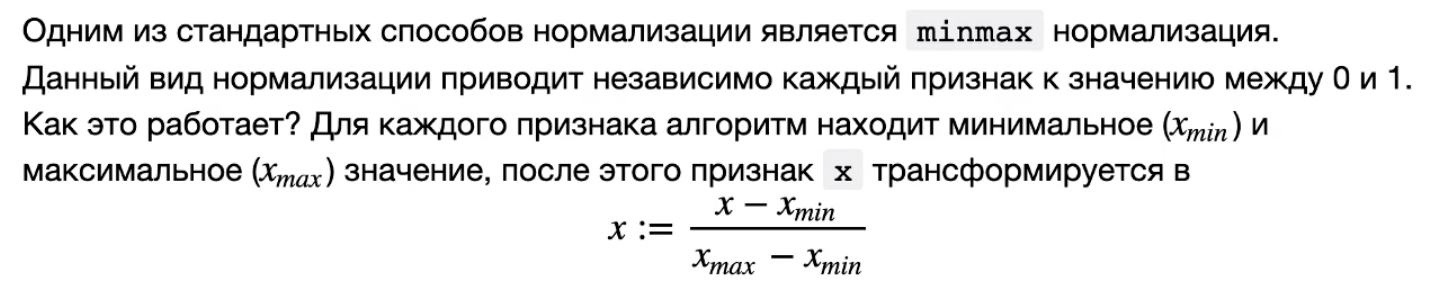

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# data = pd.read_csv('datasets/data_flats.csv',sep=";")

test_data = pd.DataFrame([
    [1, 2, np.nan],
    [3, np.nan, 417],
    [0, 10, -212],
], columns=['one', 'two', 'three'])

In [82]:
test_data.fillna(0, inplace=True)
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [84]:
scaler.fit_transform(test_data)

array([[0.33333333, 0.2       , 0.33704293],
       [1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

#### Стандартная нормализация 

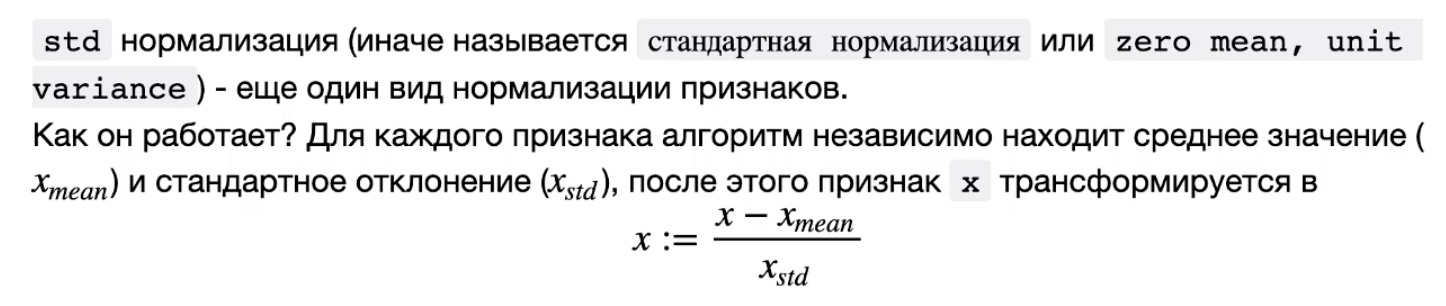

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

test_data = pd.DataFrame([
    [1, 2, np.nan],
    [3, np.nan, 417],
    [0, 10, -212],
], columns=['one', 'two', 'three'])

In [89]:
test_data.fillna(0, inplace=True)
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [90]:
scaler.fit_transform(test_data)

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

## Практика

### Задание 2.8.3

Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.read_csv('datasets/train_2.csv', encoding = 'ISO-8859-1', 
                       low_memory = False)

df.columns


Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

In [110]:
df['balance_due'] = scaler.fit_transform(df.balance_due.values.reshape(-1,1))

df['balance_due'].min().round(5)

-13.14733

## Визуализация

Один из способов визуализации — **гистограмма** — вид диаграммы, показывающий данные в форме столбцов. Демонстрирует распределение данных по выборке внутри столбца и значений в признаке. Позволяет увидеть проблемы или некорректные значения в данных, преобразовать их в наглядную форму и распределить, чтобы облегчить работу.

**Correlation plot** — корреляционный график. Признаки в данных могут иметь сильную корреляцию, то есть линейную зависимость. Если зависимость большая, признаки несут избыточную информацию, поэтому скореллированные признаки лучше удалять.

## Практика

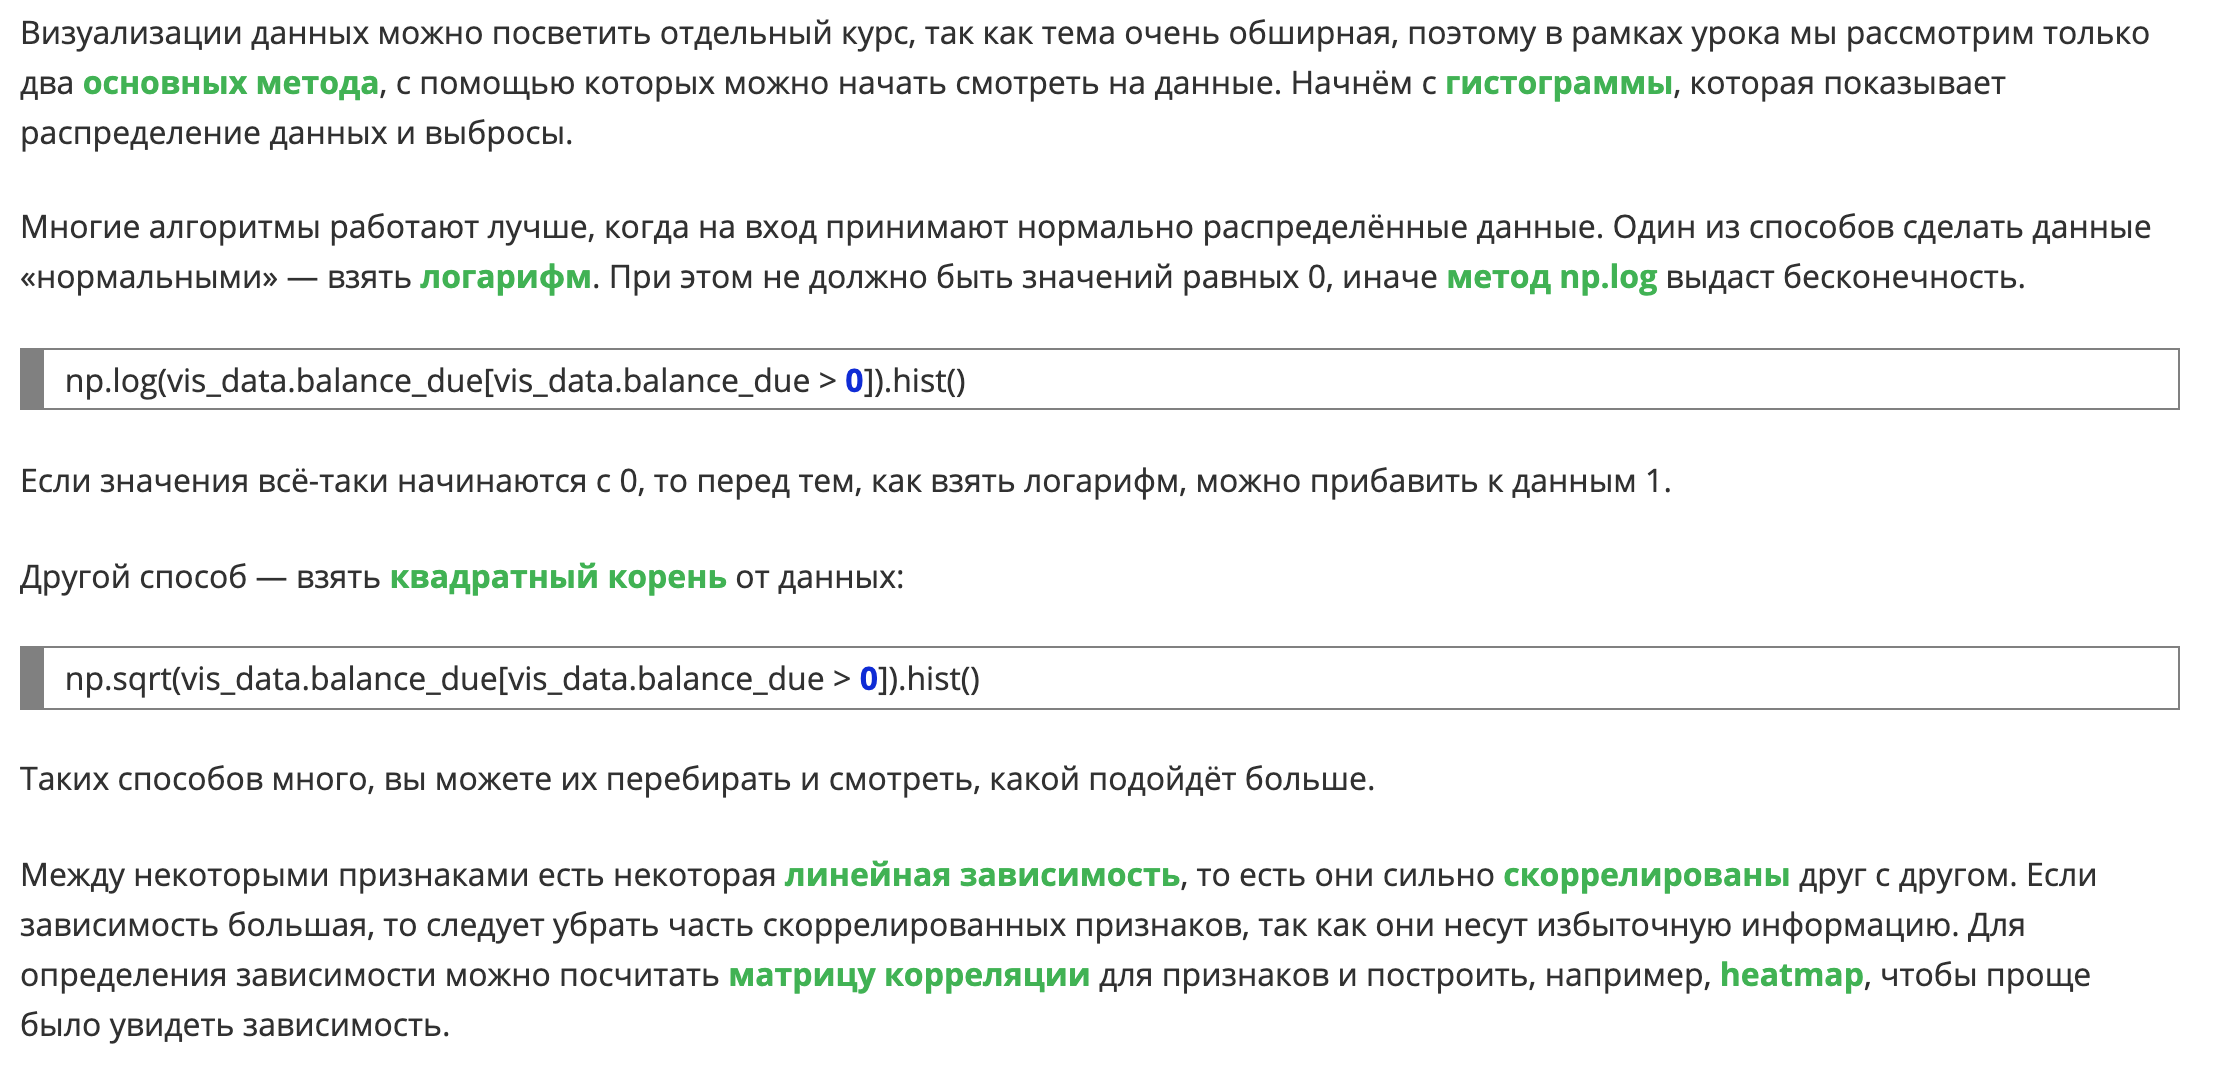

In [192]:
import seaborn as sns

df = pd.read_csv('datasets/train_2.csv', encoding='ISO-8859-1', low_memory=False)

df.shape

(250306, 34)

In [118]:
corr_table = df.drop(['violation_zip_code','payment_amount','clean_up_cost'], axis=1).dropna(axis=1).corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)


def magnify():
    return [
        dict(selector='th', props=[("font-size", "7pt")]),
        dict(selector='td', props=[("padding", "0em 0em")]),
        dict(selector='th:hover', props=[("font-size", "12pt")]),
        dict(selector='th:hover td:hover', props=[
             ("max-width", "200px"), ('font-size', '12pt')]),
    ]

In [120]:
corr_table.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption('Hover to magify')\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,violation_street_number,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
violation_street_number,-0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
admin_fee,-0.04,0.00,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,0.00,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.00,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.00,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.00,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


### Задание 2.10.3

Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [123]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datasets/train_2.csv',
                 encoding='ISO-8859-1',
                 low_memory=False)

df.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [132]:
res = np.sqrt(df[df.balance_due > 0].balance_due).agg(['median', 'mean'])

np.absolute(res['mean'] - res['median'])

0.45259606090997195

**Практика на реальных данных**

Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

In [137]:
data = pd.read_csv('datasets/data_flats.csv',sep=";")

data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [136]:
data.shape

(30469, 56)

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as most_common_state

%matplotlib inline
sns.set()

filter_data = data.loc[data.sub_area.isin(
    ['Lefortovo', 'Perovo', 'Basmannoe', 'Bogorodskoe'])]
filter_data

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
14,15,31,21.0,3.0,Lefortovo,1768.0,4,4564.0,4,0,...,0.600306,0.317270,1.028406,0.797255,1.510980,0.751314,2.883608,1.895468,poor,5000000
28,29,73,38.0,15.0,Bogorodskoe,3107.0,7,7277.0,9,0,...,1.058810,1.058810,0.260442,0.307315,1.153278,0.438261,4.161080,4.513773,poor,8254400
56,57,56,39.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,...,0.378096,0.512312,0.653392,0.233796,1.715970,0.967472,5.197710,5.253872,poor,2000000
83,84,66,42.0,7.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.555870,0.360334,1.040341,1.175502,0.835839,0.640938,1.869625,0.700781,poor,990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30254,30259,45,28.0,11.0,Perovo,2232.0,7,7966.0,7,0,...,0.803504,1.934090,1.255926,0.432873,0.445659,0.717433,2.114681,0.983895,poor,6900000
30331,30336,38,19.0,6.0,Lefortovo,1768.0,4,4564.0,4,0,...,0.505760,0.137365,1.575609,0.885490,0.534745,0.688450,2.350280,2.040573,excellent,6800000
30401,30406,61,34.0,9.0,Lefortovo,1768.0,4,4564.0,4,0,...,0.721847,0.424573,0.543295,0.878811,0.189361,0.190215,2.179935,0.685291,poor,2000000
30438,30443,99,47.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.638671,0.096033,1.288612,0.304934,0.180359,0.125858,0.936224,1.324667,excellent,10000000


<AxesSubplot:xlabel='sub_area', ylabel='price_doc'>

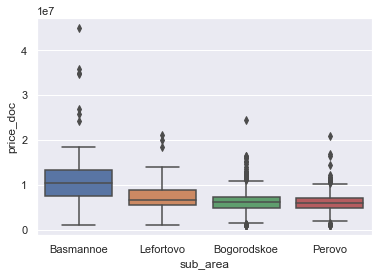

In [191]:
sns.boxplot(x='sub_area', y='price_doc', data=filter_data)

## Feature Engineering

**Feature Engineering** — способ создания признаков, техника решения задач МО, которая увеличивает качество разрабатываемых алгоритмов. Превращает специфичные данные в понятные для модели векторы.


**Способы:**

- **Ручное создание признаков** (синтез признаков). Новые признаки можно создавать на основе имеющихся, если понятно, что означает тот или иной признак. Техника может значительно улучшить модель, но требуется погружение в предметную область. Например, зная массу и рост человека, можно посчитать индекс массы тела; зная координаты места нарушения ПДД и центра города, можно посчитать расстояние между ними.

- **Полиномиальные признаки** (мат.операции). Например, попарное перемножение имеющихся столбцов, чтобы получить нелинейные комбинации признаков. Другой пример — возведение признаков в квадрат или корень из признака, чтобы получить искусственные признаки.

- **Dummy-переменные**. Между категориальными признаками не всегда есть порядок, поэтому их следует заменять на dummy-переменные, в виде цифр, чтобы алгоритм подумал, что в данных есть порядок. Например, лев, тигр, медведь лучше записать как 0, 1, 2. Расстояние между «лев» и «тигр» равно 1, а между «лев» и «медведь» — 2, хотя это не так. Решение — создать новые признаки по количеству категорий. Для признака «лев» значение будет 1, если это лев, иначе 0. Теперь расстояния между всеми признаками равны 1.

- **Работа с датой/временем**. Обычно дата — это строка, похожая на «2005-06-02». В таком виде признак имеет мало смысла, но его можно разделить на набор других признаков. Модель не принимает текст, поэтому заменяем его на набор других числовых признаков. Например, день, месяц, год или день недели, праздник/выходной.

- **Статистики по наборам признаков**. Если в данных есть признаки, описывающие значение в разные моменты времени, то они могут быть полезными. Например, зарплата_2016, зарплата_2017, зарплата_2018. Отсюда можно вытащить среднюю зарплату за 3 года, медианную зарплату, динамику зарплаты, максимальную и минимальную зарплату.

## Практика

### Задание 2.12.6

Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [324]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('datasets/train_2.csv',
                 encoding='ISO-8859-1',
                 low_memory=False)

pf = PolynomialFeatures(degree=3)
feature_df = df[['balance_due','discount_amount']]


np.argmax(
    np.mean(poly_features, axis=0)
)



6

### Задание 2.12.7

Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.
Выходными считаются дни под номерами 5 и 6.

In [329]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('datasets/train_2.csv',
                 encoding='ISO-8859-1',
                 low_memory=False)
df['ticket_issued_date'] = pd.to_datetime(df.ticket_issued_date)

In [331]:
df[df.ticket_issued_date.dt.weekday > 4].ticket_issued_date.count()

1620

#### Практика на реальных данных 

Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :
 
```python 
data.ecology = data.ecology.replace(to_replace=ecology_dict)
```

In [40]:
import numpy as np
import pandas as pd

data = pd.read_csv('datasets/data_flats.csv',sep=";")
data.head(3)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000


In [41]:
data.ecology.value_counts()

poor            8017
no data         7656
good            7173
excellent       3938
satisfactory    3685
Name: ecology, dtype: int64

In [42]:
ecology_dict = {
    'no data': 0,
    'poor': 1,
    'satisfactory': 2,
    'good': 3,
    'excellent': 4
}

# checking dtype for the repeated execute this cell
if data.ecology.dtype == str:
    data.ecology = data.ecology.replace(to_replace=ecology_dict)

data.ecology

0                good
1           excellent
2                poor
3                good
4           excellent
             ...     
30464            good
30465            poor
30466         no data
30467    satisfactory
30468            poor
Name: ecology, Length: 30469, dtype: object

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies


In [78]:
import numpy as np
import pandas as pd

data = pd.read_csv('datasets/data_flats.csv',sep=";")

ecology_dict = {
    'no data': 0,
    'poor': 1,
    'satisfactory': 2,
    'good': 3,
    'excellent': 4
}

# checking dtype for the repeated execute this cell
if data.ecology.dtype == np.object:
    data.ecology = data.ecology.replace(to_replace=ecology_dict)
    
data_dummies = pd.get_dummies(data['sub_area'], prefix='sub_area')
data = data.merge(data_dummies, left_index=True, right_index=True)

# remove no longer needed column
data.drop(['sub_area'], axis=1, inplace=True)

display(
    data.shape, 
    data.ecology.mean().round(2)
)

(30469, 201)

1.73

## Поиск выбросов

**Выброс** — результат измерения, который выделяется из общей выборки. Выбросы появляются из-за ошибок в данных и сильно выделяющихся среди остальных значений. Их нужно искать и удалять, иначе данные будут подстраиваться под них и давать неверный результат.

**Как искать выбросы:**

0. **С помощью здравого смысла/логики и метода пристального взгляда**
1. **Поиск и удаление по порогу**. Способ нахождения выбросов, основанный на здравом смысле и методе пристального взгляда. Посмотреть данные и поискать невозможные и нелогичные значения, например, в столбце «высота здания» стоит 30 км.
2. **Поиск с помощью статистики**. Поиск с помощью здравого смысла трудно автоматизировать, поэтому эффективнее статистические методы. Например, **поиск по отклонению** или **по распределению IQR** (interquartile range, межквартильное расстояние).
3. **Поиск с помощью DBSCAN**. Поиск с помощью методов кластеризации, один из таких методов — DBSCAN, который может автоматически находить шум в данных.

<span style="font-size: 20pt">&#128161;</span> Разные способы поиска выбросов могут давать разные результаты. Не всегда выделяющееся значение будет являться выбросом, возможно, у нас пока просто не хватает данных.

## Практика

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('datasets/train_2.csv',
                 encoding='ISO-8859-1',
                 low_memory=False)
df['ticket_issued_date'] = pd.to_datetime(df.ticket_issued_date)
df.shape

In [123]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]


d = df[
    df.index.isin(
        outliers_iqr(
            df.balance_due.dropna()
        )
    )
].agg(['min', 'max']).balance_due

np.abs(d.max() - d.min())

18780.0